In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import nltk 
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [2]:
from wordcloud import STOPWORDS
from PIL import Image
import numpy as np

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
from twython import Twython

In [5]:
from textblob import TextBlob

In [6]:
CONSUMER_KEY = 'j4VaBsdmFpnOABMEpJFhsYPz6'
CONSUMER_SECRET = 'V3a0RNU9urEtUJ1WHroGza7MsQnsJcUZJclWSK5SlMN284RPQB'

twitter = Twython(CONSUMER_KEY, CONSUMER_SECRET)

In [7]:
results=twitter.search(q='ChatGPT',count=100)

In [8]:
results

{'statuses': [{'created_at': 'Tue Jan 24 12:39:10 +0000 2023',
   'id': 1617864587327700992,
   'id_str': '1617864587327700992',
   'text': 'RT @KurtisHanni: ChatGPT is an amazing resource for Entrepreneurs &amp; Accountants.\n\nBut most people stink at writing prompts.\n\nSo I built a 1…',
   'truncated': False,
   'entities': {'hashtags': [],
    'symbols': [],
    'user_mentions': [{'screen_name': 'KurtisHanni',
      'name': 'Kurtis Hanni',
      'id': 21177803,
      'id_str': '21177803',
      'indices': [3, 15]}],
    'urls': []},
   'metadata': {'iso_language_code': 'en', 'result_type': 'recent'},
   'source': '<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>',
   'in_reply_to_status_id': None,
   'in_reply_to_status_id_str': None,
   'in_reply_to_user_id': None,
   'in_reply_to_user_id_str': None,
   'in_reply_to_screen_name': None,
   'user': {'id': 1331669851472060419,
    'id_str': '1331669851472060419',
    'name': 'Brandon M.',
    'screen

In [9]:
all_items=results['statuses']

In [10]:
tweet_df=pd.DataFrame(all_items)
tweet_df.head()

,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,...,retweet_count,favorite_count,favorited,retweeted,lang,possibly_sensitive,quoted_status_id,quoted_status_id_str,extended_entities,quoted_status
0,Tue Jan 24 12:39:10 +0000 2023,1617864587327700992,1617864587327700992,RT @KurtisHanni: ChatGPT is an amazing resourc...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/#!/download/ipad"" ...",NaN,None,...,1893,0,False,False,en,NaN,NaN,NaN,NaN,NaN
1,Tue Jan 24 12:39:10 +0000 2023,1617864585998110723,1617864585998110723,ChatGPT有料版は月額42ドル？ ｢これは破格｣の声も | ギズモード・ジャパン htt...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'ja', 'result_type': 're...","<a href=""http://twitter.com/#!/download/ipad"" ...",NaN,None,...,0,0,False,False,ja,False,NaN,NaN,NaN,NaN
2,Tue Jan 24 12:39:10 +0000 2023,1617864584974696448,1617864584974696448,RT @MEEDIA: Es soll sich laut Finanzdienst Blo...,False,"{'hashtags': [{'text': 'ChatGPT', 'indices': [...","{'iso_language_code': 'de', 'result_type': 're...","<a href=""https://dlvrit.com/"" rel=""nofollow"">d...",NaN,None,...,1,0,False,False,de,False,NaN,NaN,NaN,NaN
3,Tue Jan 24 12:39:09 +0000 2023,1617864581740888066,1617864581740888066,RT @ProfNoahGian: The best thing about switchi...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,None,...,282,0,False,False,en,NaN,NaN,NaN,NaN,NaN
4,Tue Jan 24 12:39:09 +0000 2023,1617864580830478337,1617864580830478337,"KFC victime d’un ransomware, des centaines de ...",True,"{'hashtags': [{'text': 'cryptocurrencies', 'in...","{'iso_language_code': 'fr', 'result_type': 're...","<a href=""https://www.semrush.com/"" rel=""nofoll...",NaN,None,...,0,0,False,False,fr,False,NaN,NaN,NaN,NaN


In [11]:
tweet_user=pd.DataFrame(d['user'] for d in results['statuses'])
tweet_user.head()

,id,id_str,name,screen_name,location,description,url,entities,protected,followers_count,...,profile_text_color,profile_use_background_image,has_extended_profile,default_profile,default_profile_image,following,follow_request_sent,notifications,translator_type,withheld_in_countries
0,1331669851472060419,1331669851472060419,Brandon M.,B_Makowski,"Florida, USA",Investor and Entrepreneur. Passionate about bo...,None,{'description': {'urls': []}},False,39,...,333333,True,True,True,False,None,None,None,none,[]
1,2590991454,2590991454,ちわわ,chiwawa_2525,日本,気になったことをツイートしています。 ☆気軽にフォローしてください [手動]☆ ・白猫プロ...,None,{'description': {'urls': []}},False,1463,...,333333,False,True,False,False,None,None,None,none,[]
2,1510575556810711047,1510575556810711047,mediadata,mediendataplan,Berlin,mediadata service DACH,None,{'description': {'urls': []}},False,54,...,333333,True,True,True,False,None,None,None,none,[]
3,145362163,145362163,Drew Lewis,siwelwerd,"Palo Alto, CA","Mathematician, homebrewer, BJCP Master judge. ...",https://t.co/MfE3KCWvCO,{'url': {'urls': [{'url': 'https://t.co/MfE3KC...,False,1893,...,333333,True,False,False,False,None,None,None,none,[]
4,1273173749492219905,1273173749492219905,"Cybersécurité, IA, Metavers, Cryptomonnaies",VeilleCyber3,Paris,Top 10 Influencers #insurtech / #cybersecurity...,https://t.co/yCUYTmGzZa,{'url': {'urls': [{'url': 'https://t.co/yCUYTm...,False,3050,...,333333,True,True,True,False,None,None,None,none,[]


In [12]:
tweet_df

,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,...,retweet_count,favorite_count,favorited,retweeted,lang,possibly_sensitive,quoted_status_id,quoted_status_id_str,extended_entities,quoted_status
0,Tue Jan 24 12:39:10 +0000 2023,1617864587327700992,1617864587327700992,RT @KurtisHanni: ChatGPT is an amazing resourc...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/#!/download/ipad"" ...",NaN,None,...,1893,0,False,False,en,NaN,NaN,NaN,NaN,NaN
1,Tue Jan 24 12:39:10 +0000 2023,1617864585998110723,1617864585998110723,ChatGPT有料版は月額42ドル？ ｢これは破格｣の声も | ギズモード・ジャパン htt...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'ja', 'result_type': 're...","<a href=""http://twitter.com/#!/download/ipad"" ...",NaN,None,...,0,0,False,False,ja,False,NaN,NaN,NaN,NaN
2,Tue Jan 24 12:39:10 +0000 2023,1617864584974696448,1617864584974696448,RT @MEEDIA: Es soll sich laut Finanzdienst Blo...,False,"{'hashtags': [{'text': 'ChatGPT', 'indices': [...","{'iso_language_code': 'de', 'result_type': 're...","<a href=""https://dlvrit.com/"" rel=""nofollow"">d...",NaN,None,...,1,0,False,False,de,False,NaN,NaN,NaN,NaN
3,Tue Jan 24 12:39:09 +0000 2023,1617864581740888066,1617864581740888066,RT @ProfNoahGian: The best thing about switchi...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,None,...,282,0,False,False,en,NaN,NaN,NaN,NaN,NaN
4,Tue Jan 24 12:39:09 +0000 2023,1617864580830478337,1617864580830478337,"KFC victime d’un ransomware, des centaines de ...",True,"{'hashtags': [{'text': 'cryptocurrencies', 'in...","{'iso_language_code': 'fr', 'result_type': 're...","<a href=""https://www.semrush.com/"" rel=""nofoll...",NaN,None,...,0,0,False,False,fr,False,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Tue Jan 24 12:38:08 +0000 2023,1617864327071141888,1617864327071141888,RT @KurtisHanni: ChatGPT is an amazing resourc...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,...,1893,0,False,False,en,NaN,NaN,NaN,NaN,NaN
96,Tue Jan 24 12:38:08 +0000 2023,1617864326383296512,1617864326383296512,RT @ignaciorubio: 🤖¿Una respuesta alemana a #C...,False,"{'hashtags': [{'text': 'ChatGPT', 'indices': [...","{'iso_language_code': 'es', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,...,1,0,False,False,es,NaN,NaN,NaN,NaN,NaN
97,Tue Jan 24 12:38:07 +0000 2023,1617864320590938113,1617864320590938113,RT @BowKraivanich: AI อย่าง chatGPT ทำให้การทำ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'th', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,None,...,12,0,False,False,th,NaN,NaN,NaN,NaN,NaN
98,Tue Jan 24 12:38:06 +0000 2023,1617864317050945536,1617864317050945536,RT @seimeitsuzaki: 『ChatGPT』×『スプレッドシート』でビジネスに革...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'ja', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,336,0,False,False,ja,NaN,NaN,NaN,NaN,NaN


In [13]:
df=tweet_df.merge(tweet_user,left_index=True,right_index=True)

In [14]:
df

,created_at_x,id_x,id_str_x,text,truncated,entities_x,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,...,profile_text_color,profile_use_background_image,has_extended_profile,default_profile,default_profile_image,following,follow_request_sent,notifications,translator_type,withheld_in_countries
0,Tue Jan 24 12:39:10 +0000 2023,1617864587327700992,1617864587327700992,RT @KurtisHanni: ChatGPT is an amazing resourc...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/#!/download/ipad"" ...",NaN,None,...,333333,True,True,True,False,None,None,None,none,[]
1,Tue Jan 24 12:39:10 +0000 2023,1617864585998110723,1617864585998110723,ChatGPT有料版は月額42ドル？ ｢これは破格｣の声も | ギズモード・ジャパン htt...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'ja', 'result_type': 're...","<a href=""http://twitter.com/#!/download/ipad"" ...",NaN,None,...,333333,False,True,False,False,None,None,None,none,[]
2,Tue Jan 24 12:39:10 +0000 2023,1617864584974696448,1617864584974696448,RT @MEEDIA: Es soll sich laut Finanzdienst Blo...,False,"{'hashtags': [{'text': 'ChatGPT', 'indices': [...","{'iso_language_code': 'de', 'result_type': 're...","<a href=""https://dlvrit.com/"" rel=""nofollow"">d...",NaN,None,...,333333,True,True,True,False,None,None,None,none,[]
3,Tue Jan 24 12:39:09 +0000 2023,1617864581740888066,1617864581740888066,RT @ProfNoahGian: The best thing about switchi...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,None,...,333333,True,False,False,False,None,None,None,none,[]
4,Tue Jan 24 12:39:09 +0000 2023,1617864580830478337,1617864580830478337,"KFC victime d’un ransomware, des centaines de ...",True,"{'hashtags': [{'text': 'cryptocurrencies', 'in...","{'iso_language_code': 'fr', 'result_type': 're...","<a href=""https://www.semrush.com/"" rel=""nofoll...",NaN,None,...,333333,True,True,True,False,None,None,None,none,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Tue Jan 24 12:38:08 +0000 2023,1617864327071141888,1617864327071141888,RT @KurtisHanni: ChatGPT is an amazing resourc...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,...,333333,True,True,True,False,None,None,None,none,[]
96,Tue Jan 24 12:38:08 +0000 2023,1617864326383296512,1617864326383296512,RT @ignaciorubio: 🤖¿Una respuesta alemana a #C...,False,"{'hashtags': [{'text': 'ChatGPT', 'indices': [...","{'iso_language_code': 'es', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,...,333333,True,True,False,False,None,None,None,none,[]
97,Tue Jan 24 12:38:07 +0000 2023,1617864320590938113,1617864320590938113,RT @BowKraivanich: AI อย่าง chatGPT ทำให้การทำ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'th', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,None,...,000000,False,True,False,False,None,None,None,none,[]
98,Tue Jan 24 12:38:06 +0000 2023,1617864317050945536,1617864317050945536,RT @seimeitsuzaki: 『ChatGPT』×『スプレッドシート』でビジネスに革...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'ja', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,000000,False,True,False,False,None,None,None,none,[]


In [15]:
df.head()

,created_at_x,id_x,id_str_x,text,truncated,entities_x,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,...,profile_text_color,profile_use_background_image,has_extended_profile,default_profile,default_profile_image,following,follow_request_sent,notifications,translator_type,withheld_in_countries
0,Tue Jan 24 12:39:10 +0000 2023,1617864587327700992,1617864587327700992,RT @KurtisHanni: ChatGPT is an amazing resourc...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/#!/download/ipad"" ...",NaN,None,...,333333,True,True,True,False,None,None,None,none,[]
1,Tue Jan 24 12:39:10 +0000 2023,1617864585998110723,1617864585998110723,ChatGPT有料版は月額42ドル？ ｢これは破格｣の声も | ギズモード・ジャパン htt...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'ja', 'result_type': 're...","<a href=""http://twitter.com/#!/download/ipad"" ...",NaN,None,...,333333,False,True,False,False,None,None,None,none,[]
2,Tue Jan 24 12:39:10 +0000 2023,1617864584974696448,1617864584974696448,RT @MEEDIA: Es soll sich laut Finanzdienst Blo...,False,"{'hashtags': [{'text': 'ChatGPT', 'indices': [...","{'iso_language_code': 'de', 'result_type': 're...","<a href=""https://dlvrit.com/"" rel=""nofollow"">d...",NaN,None,...,333333,True,True,True,False,None,None,None,none,[]
3,Tue Jan 24 12:39:09 +0000 2023,1617864581740888066,1617864581740888066,RT @ProfNoahGian: The best thing about switchi...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,None,...,333333,True,False,False,False,None,None,None,none,[]
4,Tue Jan 24 12:39:09 +0000 2023,1617864580830478337,1617864580830478337,"KFC victime d’un ransomware, des centaines de ...",True,"{'hashtags': [{'text': 'cryptocurrencies', 'in...","{'iso_language_code': 'fr', 'result_type': 're...","<a href=""https://www.semrush.com/"" rel=""nofoll...",NaN,None,...,333333,True,True,True,False,None,None,None,none,[]


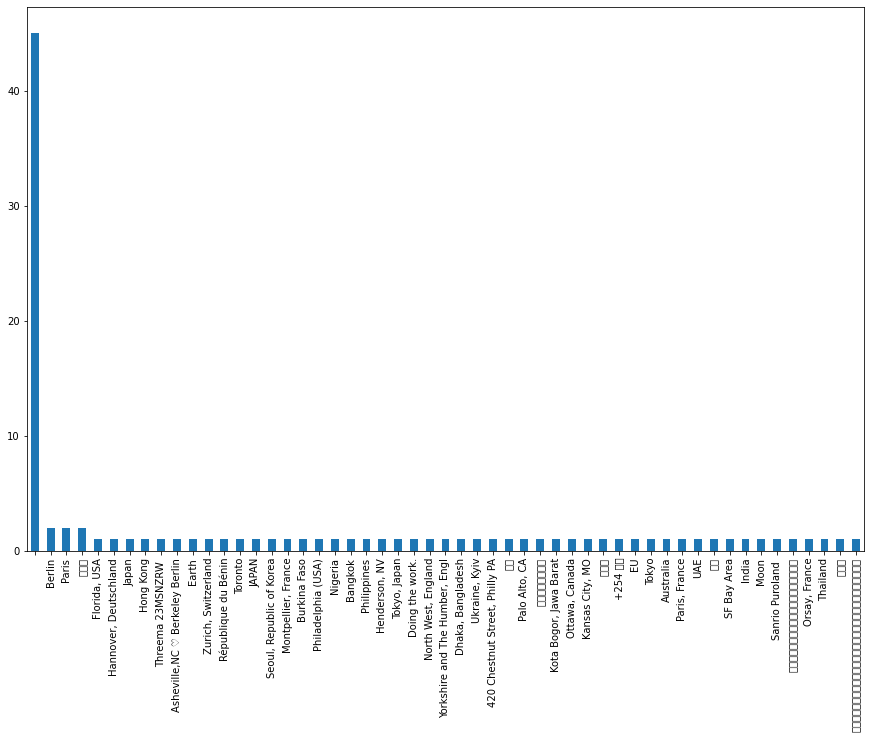

In [16]:
df.location.value_counts().plot(kind='bar',figsize=(15,10));

In [17]:
df2 = df['text']
df = pd.DataFrame(df2)

In [18]:
df

,text
0,RT @KurtisHanni: ChatGPT is an amazing resourc...
1,ChatGPT有料版は月額42ドル？ ｢これは破格｣の声も | ギズモード・ジャパン htt...
2,RT @MEEDIA: Es soll sich laut Finanzdienst Blo...
3,RT @ProfNoahGian: The best thing about switchi...
4,"KFC victime d’un ransomware, des centaines de ..."
...,...
95,RT @KurtisHanni: ChatGPT is an amazing resourc...
96,RT @ignaciorubio: 🤖¿Una respuesta alemana a #C...
97,RT @BowKraivanich: AI อย่าง chatGPT ทำให้การทำ...
98,RT @seimeitsuzaki: 『ChatGPT』×『スプレッドシート』でビジネスに革...


In [19]:
df['text'].replace({'[^\w\s]':''},regex=True,inplace=True)

In [20]:
df['text']=df['text'].str.lower()

In [21]:
df['text'].replace({'\n':'','\r':'',"\'":""},regex=True,inplace=True)

In [22]:
df['text'].replace({'\d+':''},regex=True,inplace=True)

In [23]:
df['text'].replace({'r"\&\#[0-9]+\;"':''},regex=True,inplace=True)
#HTML characters removed

In [24]:
df['text'].replace({'r"[\s]+"':''},regex=True,inplace=True)

In [25]:
from nltk.corpus import stopwords
stop_words=stopwords.words('english')
df['text']=df['text'].apply(lambda x:" ".join([i for i in str(x).split(" ")  if i not in stop_words]))

In [26]:
from unicodedata import normalize
df['text']=df['text'].apply(lambda text: normalize("NFKD", str(text)).encode("ascii", "ignore").decode("utf-8", "ignore"))
#Accents removed

In [27]:
from nltk.tokenize import TreebankWordTokenizer
tokenizer=TreebankWordTokenizer()
df['tokenized']=[tokenizer.tokenize(i) for i in df['text'].values]

In [28]:
df.tokenized

0     [rt, kurtishanni, chatgpt, amazing, resource, ...
1                          [chatgpt, httpstcomavfegmyk]
2     [rt, meedia, es, soll, sich, laut, finanzdiens...
3     [rt, profnoahgian, best, thing, switching, web...
4     [kfc, victime, dun, ransomware, des, centaines...
                            ...                        
95    [rt, kurtishanni, chatgpt, amazing, resource, ...
96    [rt, ignaciorubio, una, respuesta, alemana, ch...
97              [rt, bowkraivanich, ai, chatgpt, brief]
98                       [rt, seimeitsuzaki, chatgptai]
99                             [rt, mr_wolfst, chatgpt]
Name: tokenized, Length: 100, dtype: object

In [29]:
df

,text,tokenized
0,rt kurtishanni chatgpt amazing resource entrep...,"[rt, kurtishanni, chatgpt, amazing, resource, ..."
1,chatgpt httpstcomavfegmyk,"[chatgpt, httpstcomavfegmyk]"
2,rt meedia es soll sich laut finanzdienst bloom...,"[rt, meedia, es, soll, sich, laut, finanzdiens..."
3,rt profnoahgian best thing switching web searc...,"[rt, profnoahgian, best, thing, switching, web..."
4,kfc victime dun ransomware des centaines de re...,"[kfc, victime, dun, ransomware, des, centaines..."
...,...,...
95,rt kurtishanni chatgpt amazing resource entrep...,"[rt, kurtishanni, chatgpt, amazing, resource, ..."
96,rt ignaciorubio una respuesta alemana chatgpte...,"[rt, ignaciorubio, una, respuesta, alemana, ch..."
97,rt bowkraivanich ai chatgpt brief,"[rt, bowkraivanich, ai, chatgpt, brief]"
98,rt seimeitsuzaki chatgptai,"[rt, seimeitsuzaki, chatgptai]"


In [30]:
from langdetect import detect
df['language']=df['text'].apply(detect)
df=df[df['language']=='en']
df

,text,tokenized,language
0,rt kurtishanni chatgpt amazing resource entrep...,"[rt, kurtishanni, chatgpt, amazing, resource, ...",en
1,chatgpt httpstcomavfegmyk,"[chatgpt, httpstcomavfegmyk]",en
3,rt profnoahgian best thing switching web searc...,"[rt, profnoahgian, best, thing, switching, web...",en
6,rt apompliano fact elon musk founder openai ma...,"[rt, apompliano, fact, elon, musk, founder, op...",en
7,rt janellebowden love using chatgpt answer inf...,"[rt, janellebowden, love, using, chatgpt, answ...",en
...,...,...,...
92,chatgpt,[chatgpt],en
93,ldnbox starting sites different niches using c...,"[ldnbox, starting, sites, different, niches, u...",en
95,rt kurtishanni chatgpt amazing resource entrep...,"[rt, kurtishanni, chatgpt, amazing, resource, ...",en
97,rt bowkraivanich ai chatgpt brief,"[rt, bowkraivanich, ai, chatgpt, brief]",en


In [31]:
df[['polarity','subjectivity']]=df['text'].apply(lambda t:pd.Series(TextBlob(t).sentiment))

In [32]:
df

,text,tokenized,language,polarity,subjectivity
0,rt kurtishanni chatgpt amazing resource entrep...,"[rt, kurtishanni, chatgpt, amazing, resource, ...",en,0.60,0.900000
1,chatgpt httpstcomavfegmyk,"[chatgpt, httpstcomavfegmyk]",en,0.00,0.000000
3,rt profnoahgian best thing switching web searc...,"[rt, profnoahgian, best, thing, switching, web...",en,1.00,0.300000
6,rt apompliano fact elon musk founder openai ma...,"[rt, apompliano, fact, elon, musk, founder, op...",en,0.00,0.000000
7,rt janellebowden love using chatgpt answer inf...,"[rt, janellebowden, love, using, chatgpt, answ...",en,0.25,0.500000
...,...,...,...,...,...
92,chatgpt,[chatgpt],en,0.00,0.000000
93,ldnbox starting sites different niches using c...,"[ldnbox, starting, sites, different, niches, u...",en,0.00,0.350000
95,rt kurtishanni chatgpt amazing resource entrep...,"[rt, kurtishanni, chatgpt, amazing, resource, ...",en,0.60,0.900000
97,rt bowkraivanich ai chatgpt brief,"[rt, bowkraivanich, ai, chatgpt, brief]",en,0.00,0.333333


In [33]:
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
df['lemmatize']=[[lemmatizer.lemmatize(str(i)) for i in words] for words in df['text'].values]

In [34]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Seyma\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [35]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Seyma\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [36]:
df

,text,tokenized,language,polarity,subjectivity,lemmatize
0,rt kurtishanni chatgpt amazing resource entrep...,"[rt, kurtishanni, chatgpt, amazing, resource, ...",en,0.60,0.900000,"[r, t, , k, u, r, t, i, s, h, a, n, n, i, , ..."
1,chatgpt httpstcomavfegmyk,"[chatgpt, httpstcomavfegmyk]",en,0.00,0.000000,"[c, h, a, t, g, p, t, , , , , h, t, t, p, ..."
3,rt profnoahgian best thing switching web searc...,"[rt, profnoahgian, best, thing, switching, web...",en,1.00,0.300000,"[r, t, , p, r, o, f, n, o, a, h, g, i, a, n, ..."
6,rt apompliano fact elon musk founder openai ma...,"[rt, apompliano, fact, elon, musk, founder, op...",en,0.00,0.000000,"[r, t, , a, p, o, m, p, l, i, a, n, o, , f, ..."
7,rt janellebowden love using chatgpt answer inf...,"[rt, janellebowden, love, using, chatgpt, answ...",en,0.25,0.500000,"[r, t, , j, a, n, e, l, l, e, b, o, w, d, e, ..."
...,...,...,...,...,...,...
92,chatgpt,[chatgpt],en,0.00,0.000000,"[c, h, a, t, g, p, t]"
93,ldnbox starting sites different niches using c...,"[ldnbox, starting, sites, different, niches, u...",en,0.00,0.350000,"[l, d, n, b, o, x, , s, t, a, r, t, i, n, g, ..."
95,rt kurtishanni chatgpt amazing resource entrep...,"[rt, kurtishanni, chatgpt, amazing, resource, ...",en,0.60,0.900000,"[r, t, , k, u, r, t, i, s, h, a, n, n, i, , ..."
97,rt bowkraivanich ai chatgpt brief,"[rt, bowkraivanich, ai, chatgpt, brief]",en,0.00,0.333333,"[r, t, , b, o, w, k, r, a, i, v, a, n, i, c, ..."


In [37]:
df.loc[df['subjectivity']>0.5,'sentiment']=2 #pozitive
df.loc[df['subjectivity']==0.5,'sentiment']=1 #neutral
df.loc[df['subjectivity']<0.5,'sentiment']=0 #negative
df

,text,tokenized,language,polarity,subjectivity,lemmatize,sentiment
0,rt kurtishanni chatgpt amazing resource entrep...,"[rt, kurtishanni, chatgpt, amazing, resource, ...",en,0.60,0.900000,"[r, t, , k, u, r, t, i, s, h, a, n, n, i, , ...",2.0
1,chatgpt httpstcomavfegmyk,"[chatgpt, httpstcomavfegmyk]",en,0.00,0.000000,"[c, h, a, t, g, p, t, , , , , h, t, t, p, ...",0.0
3,rt profnoahgian best thing switching web searc...,"[rt, profnoahgian, best, thing, switching, web...",en,1.00,0.300000,"[r, t, , p, r, o, f, n, o, a, h, g, i, a, n, ...",0.0
6,rt apompliano fact elon musk founder openai ma...,"[rt, apompliano, fact, elon, musk, founder, op...",en,0.00,0.000000,"[r, t, , a, p, o, m, p, l, i, a, n, o, , f, ...",0.0
7,rt janellebowden love using chatgpt answer inf...,"[rt, janellebowden, love, using, chatgpt, answ...",en,0.25,0.500000,"[r, t, , j, a, n, e, l, l, e, b, o, w, d, e, ...",1.0
...,...,...,...,...,...,...,...
92,chatgpt,[chatgpt],en,0.00,0.000000,"[c, h, a, t, g, p, t]",0.0
93,ldnbox starting sites different niches using c...,"[ldnbox, starting, sites, different, niches, u...",en,0.00,0.350000,"[l, d, n, b, o, x, , s, t, a, r, t, i, n, g, ...",0.0
95,rt kurtishanni chatgpt amazing resource entrep...,"[rt, kurtishanni, chatgpt, amazing, resource, ...",en,0.60,0.900000,"[r, t, , k, u, r, t, i, s, h, a, n, n, i, , ...",2.0
97,rt bowkraivanich ai chatgpt brief,"[rt, bowkraivanich, ai, chatgpt, brief]",en,0.00,0.333333,"[r, t, , b, o, w, k, r, a, i, v, a, n, i, c, ...",0.0


In [38]:
def wc(data,bgcolor):
    plt.figure(figsize=(10,10))
    mask=np.array(Image.open("twitter.png"))
    wc=WordCloud(background_color=bgcolor,stopwords=STOPWORDS,mask=mask)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis("off")

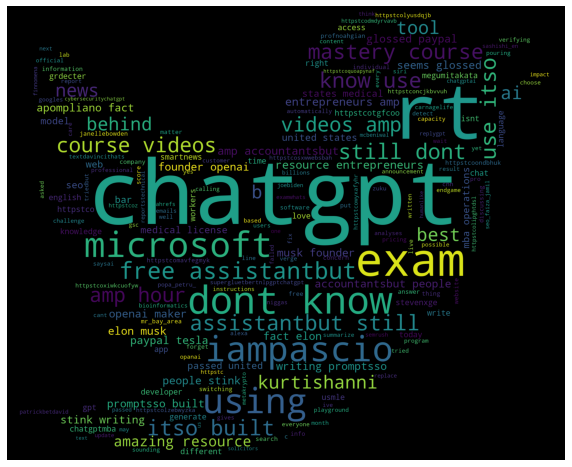

In [39]:
wc(df.text,'black')

### Classification Model

In [40]:
df1 = df[['text','sentiment']]

In [41]:
df1

,text,sentiment
0,rt kurtishanni chatgpt amazing resource entrep...,2.0
1,chatgpt httpstcomavfegmyk,0.0
3,rt profnoahgian best thing switching web searc...,0.0
6,rt apompliano fact elon musk founder openai ma...,0.0
7,rt janellebowden love using chatgpt answer inf...,1.0
...,...,...
92,chatgpt,0.0
93,ldnbox starting sites different niches using c...,0.0
95,rt kurtishanni chatgpt amazing resource entrep...,2.0
97,rt bowkraivanich ai chatgpt brief,0.0


In [58]:
def sentiment2(sent):
    if sent<-0.2:
        return 3
    elif sent>0.2:
        return 1
    else:
        return 0

In [60]:
df1["sentiment"]=df1["sentiment"].apply(sentiment2)

In [61]:
df1

,text,sentiment
0,rt kurtishanni chatgpt amazing resource entrep...,1
1,chatgpt httpstcomavfegmyk,0
3,rt profnoahgian best thing switching web searc...,0
6,rt apompliano fact elon musk founder openai ma...,0
7,rt janellebowden love using chatgpt answer inf...,1
...,...,...
92,chatgpt,0
93,ldnbox starting sites different niches using c...,0
95,rt kurtishanni chatgpt amazing resource entrep...,1
97,rt bowkraivanich ai chatgpt brief,0


<AxesSubplot:xlabel='sentiment', ylabel='count'>

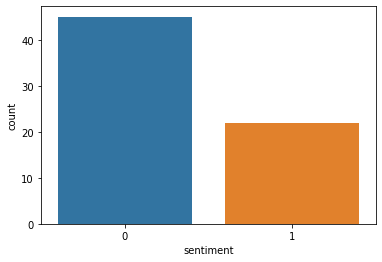

In [62]:
import seaborn as sns
sns.countplot(x=df1.sentiment)

In [63]:
x=df1["text"]
y=df1["sentiment"]

In [64]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [65]:
mb=MultinomialNB()

In [66]:
vect=CountVectorizer(stop_words="english")

In [67]:
x=vect.fit_transform(x)

In [68]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.15)

In [69]:
tahmin=mb.fit(x_train,y_train).predict(x_test)

In [70]:
accuracy_score(tahmin,y_test)

0.8181818181818182